# Assignment1b

# Damanpreet Singh, 000741359

'''This Script will filter and Classify Dow Jones Index data and show if the trading week for the index was profitble or not'''

In [1]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import csv

with open('dow_jones_index.data', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = [row for row in reader]
    collect = np.array(data)
    

In [2]:
featname = np.array(collect[0])       # array for feature name
np.random.shuffle(collect[1:])        #shuffeling array to randomize data every time
l = len(collect) -1

testlength = l-int(l*0.25)            # length for traningset and test set
trainlength = l - testlength


In [3]:
trainset = collect[1:trainlength]      # divinding array into traning and test sets using length
testset = collect[trainlength:]
trainset = trainset[:,[8,9,15]]
trainset = np.where(trainset=='', '0', trainset)       #some values were Null so had to change them to 0 to fix data type errors
trainset = np.round(trainset.astype(np.float64),3);

In [4]:
testset = testset[:,[8,9,15]]
testset = np.where(testset=='', '0', testset)     #some values were Null so had to change them to 0 to fix data type errors
testset = np.round(testset.astype(np.float64),3);

In [5]:
#setLabel function takes in a argument of array and return a label np array 
#values would be Profit, Loss or NoTrade depending on gain or loss in the trading week


def setlabel(arr):
    label = []
    for x in arr:
        if x >0 :
            label.append('Profit')
        elif x < 0:
            label.append('Loss')
        else :
            label.append('NoTrade')
    return np.array(label)

testlabel = setlabel(testset[:,0])         # catching the return and setting up labels in np array
traninglabel = setlabel(trainset[:,0])

In [6]:
#print satements to summarize the data

print('Summary of the Dow-jones data set')
print('Training Set')
print('Names: ',featname[[8,9,15]],' , Profit/Loss')
print('Minima: ',np.min(trainset,axis = 0), traninglabel[np.argmin(trainset,axis = 0)[0]])    
print('Maxima: ',np.max(trainset,axis = 0), traninglabel[np.argmax(trainset,axis = 0)[0]])
print('Means: ',np.round(np.mean(trainset,axis = 0),3))
print('Medians: ',np.median(trainset,axis = 0))
print('\n')
print('Testing Set')
print('Names: ',featname[[8,9,15]] ,' , Profit/Loss')
print('Minima: ',np.min(testset,axis = 0), testlabel[np.argmin(testset,axis = 0)[0]])
print('Maxima: ',np.max(testset,axis = 0), testlabel[np.argmax(testset,axis = 0)[0]])
print('Means: ',np.round(np.mean(testset,axis = 0),3))
print('Medians: ',np.median(testset,axis = 0))

Summary of the Dow-jones data set
Training Set
Names:  ['percent_change_price' 'percent_change_volume_over_last_wk'
 'percent_return_next_dividend']  , Profit/Loss
Minima:  [-10.28  -61.433   0.068] Loss
Maxima:  [  8.329 327.409   1.51 ] Profit
Means:  [0.29  1.455 0.691]
Medians:  [0.055 0.    0.677]


Testing Set
Names:  ['percent_change_price' 'percent_change_volume_over_last_wk'
 'percent_return_next_dividend']  , Profit/Loss
Minima:  [-15.423 -60.988   0.066] Loss
Maxima:  [  9.882 323.282   1.564] Profit
Means:  [-0.029  6.661  0.692]
Medians:  [-0.0105  0.39    0.6855]


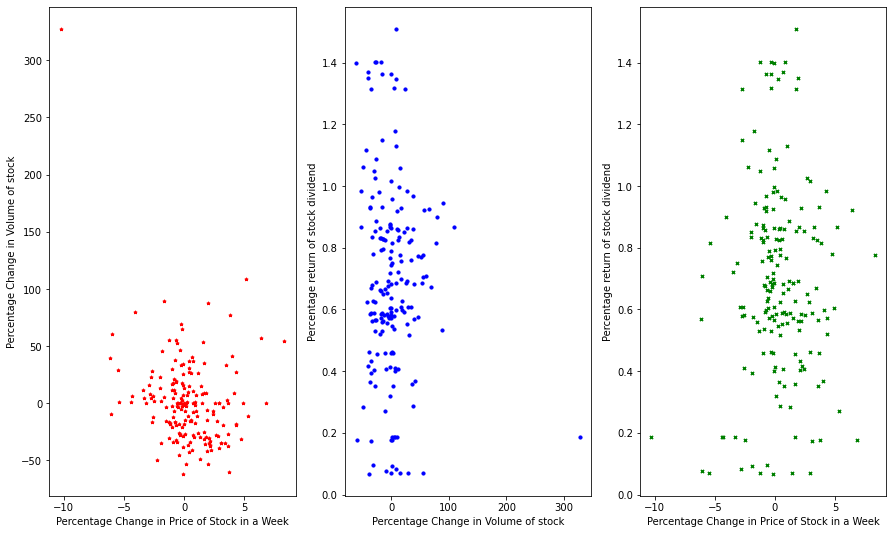

In [7]:
# plotting all teh data against Each other 


x = trainset[:,0]
y = trainset[:,1]
z = trainset[:,2]

plt.figure(figsize=(15,9))

plt.subplot(1,3,1)
#figure has 1 row 2 column,this is the first plot
plt.scatter(x,y,marker = '*',color = 'r',s=10)
plt.xlabel('Percentage Change in Price of Stock in a Week')
plt.ylabel('Percentage Change in Volume of stock')

plt.subplot(1,3,2)
#figure has 1 row 2 column,this is the second plot
plt.scatter(y,z,marker = 'o',color = 'b',s=10)
plt.xlabel('Percentage Change in Volume of stock')
plt.ylabel('Percentage return of stock dividend')

plt.subplot(1,3,3)
#figure has 1 row 2 column,this is the third plot
plt.scatter(x,z,marker = 'x',color = 'g',s=10)
plt.xlabel('Percentage Change in Price of Stock in a Week')
plt.ylabel('Percentage return of stock dividend')
plt.show()


In [8]:
# using dict to get over all frequency of label. will do it for both traning label and test label to show in a bar chart.
# this funtion taken in label argument and return Dict


def overfreq(label):
    countfreq = {}
    for l in label:
        try:
            countfreq[l] += 1
        except:
            countfreq[l] = 1
    return countfreq

trainfreq = overfreq(traninglabel)     # frequencies collected as dictoneries and wil lbe plotted as a bar graph
testfreq = overfreq(testlabel)


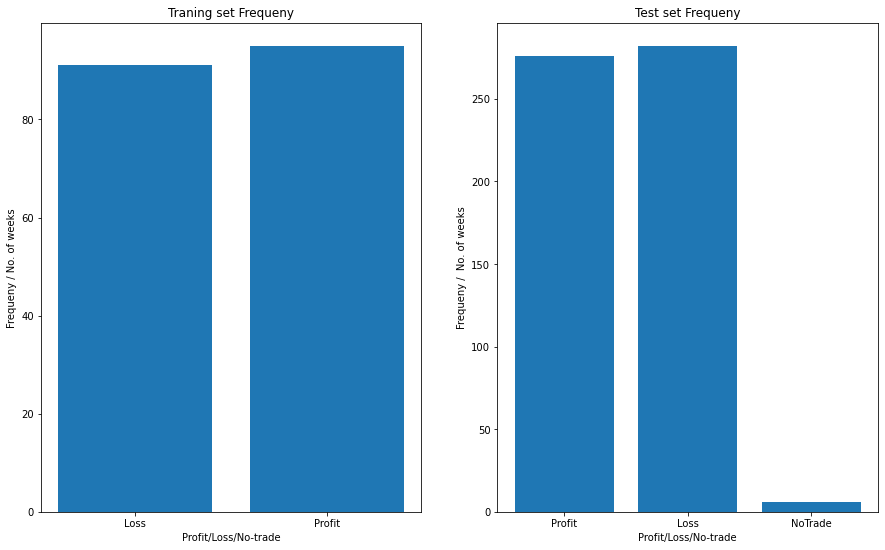

In [9]:

# These bar cahrt will show overall frequeny or No. of weeks dow jones index was in Profit/Loss/No-trade

plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
plt.title('Traning set Frequeny')
plt.bar(trainfreq.keys(),trainfreq.values())
plt.xlabel('Profit/Loss/No-trade')
plt.ylabel('Frequeny / No. of weeks')

plt.subplot(1,2,2)
plt.title('Test set Frequeny')
plt.bar(testfreq.keys(),testfreq.values(),)
plt.xlabel('Profit/Loss/No-trade')
plt.ylabel('Frequeny /  No. of weeks')

plt.show()